In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp
corr = Correlation(perp_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps', spot_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots')

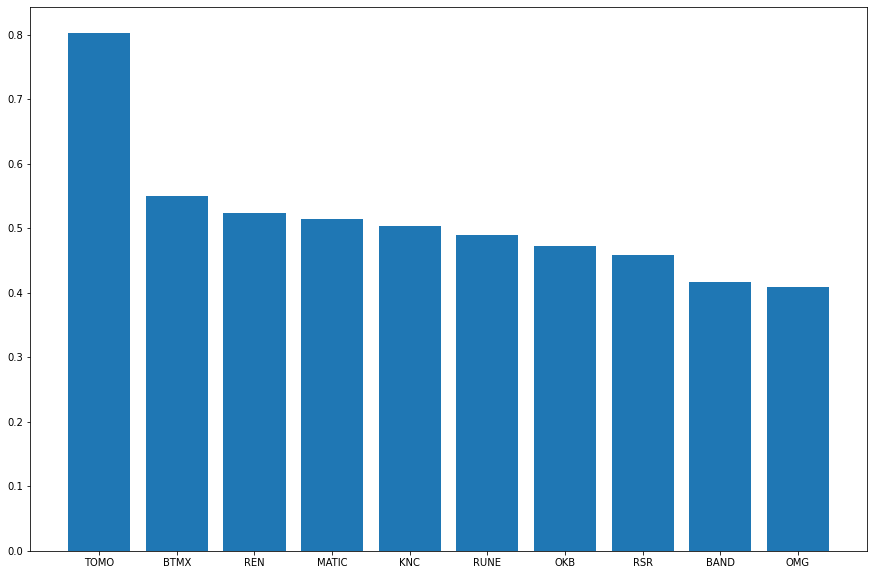

In [17]:

df = pd.read_csv('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/token_borrow_rate.csv')
token_list = df['coin'].to_list()
corr.rank_vol('H', lookback_period = 720, filter_list = token_list)

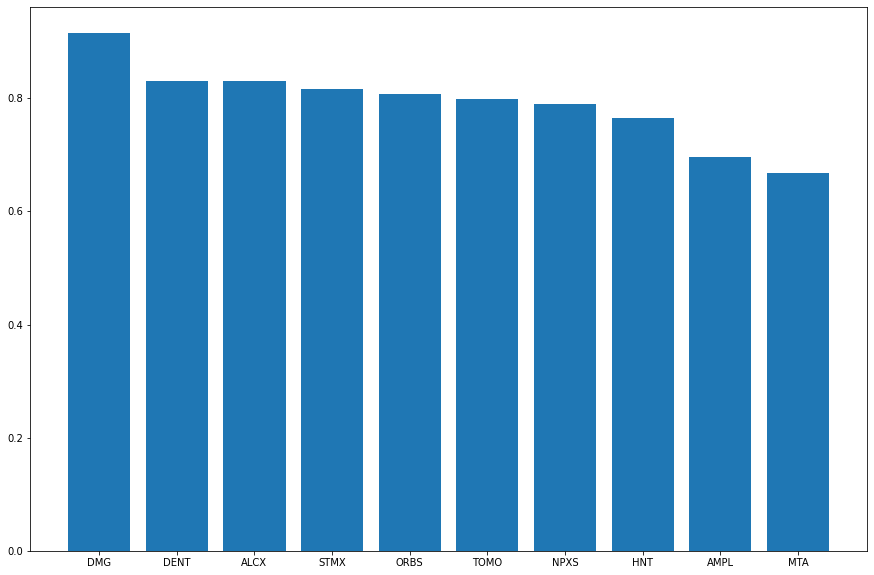

In [18]:
corr.rank_vol('H', lookback_period = 720)

In [35]:
df_spot = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/TOMO_historical_data.csv').change_resolution('5T', 'SPOT')
df_perp = CSVManager('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/TOMO-PERP_historical_data.csv').change_resolution('5T', 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low',
                                                'close': 'perp_close', 'volume': 'perp_volume', 'vwap': 'perp_vwap'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low',
                                                'close': 'spot_close', 'volume': 'spot_volume', 'vwap': 'spot_vwap'}, inplace=True)
                      
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])
joint_df['spread'] = (joint_df['perp_vwap'] - joint_df['spot_vwap'])/joint_df['perp_vwap']*100

# joint_df['spread']=joint_df['spread'].fillna(joint_df['spread'].tail(4320).mean())


joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')


joint_df

,perp_volume,perp_vwap,spot_volume,spot_vwap,spread
timestamp,,,,,
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-04-03T00:20:00+00:00,22254.229020,2.791003,7870.873420,2.803533,-0.448944
2021-04-03T00:25:00+00:00,20749.087605,2.789632,854.319045,2.793855,-0.151415
2021-04-03T00:30:00+00:00,15327.612665,2.789817,5320.371855,2.804763,-0.535715


mean: 0.024939081817337207; std: 0.3651946576392421


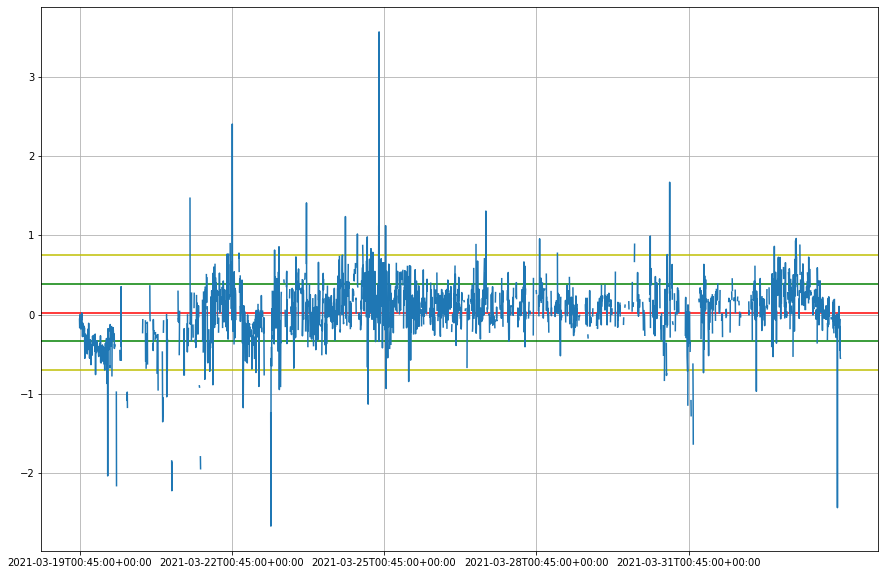

In [36]:
fig, ax = plt.subplofig, ax = plt.subplots(figsize=(15,10))
lookback=4320
spread=joint_df['spread'].tail(lookback)

std=np.std(joint_df['spread'].tail(lookback))

mean = np.mean(joint_df['spread'].tail(lookback))
negative_std = mean-std
positive_std = mean+std


ax.set_xticks([0, (lookback/5), (lookback/5)*2, (lookback/5)*3, (lookback/5)*4])
ax.grid()
ax.axhline(y=negative_std, color='green', linestyle='-')
ax.axhline(y=positive_std, color='green', linestyle='-')
ax.axhline(y=mean, color='r', linestyle='-')
ax.axhline(y=mean+2*std, color='y', linestyle='-')
ax.axhline(y=mean-2*std, color='y', linestyle='-')


ax.plot(spread)
print(f'mean: {mean}; std: {std}')

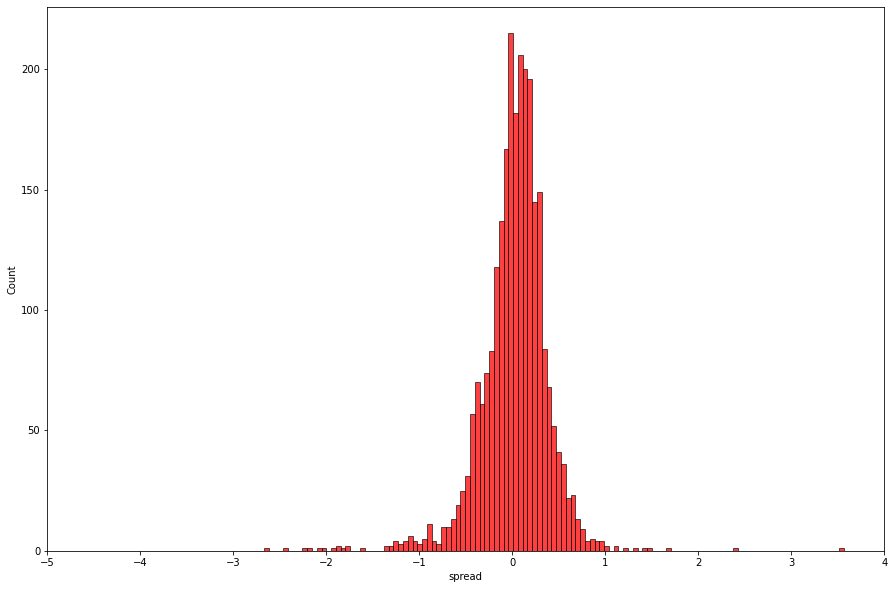

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread, color='r')

ax.set_xticks(range(-5,5))

In [38]:
min_std = np.std(joint_df['spread'].tail(72))
min_mean = np.mean(joint_df['spread'].tail(72))
print(min_std, min_mean) 

0.34786460240269723 -0.11363530549996738
